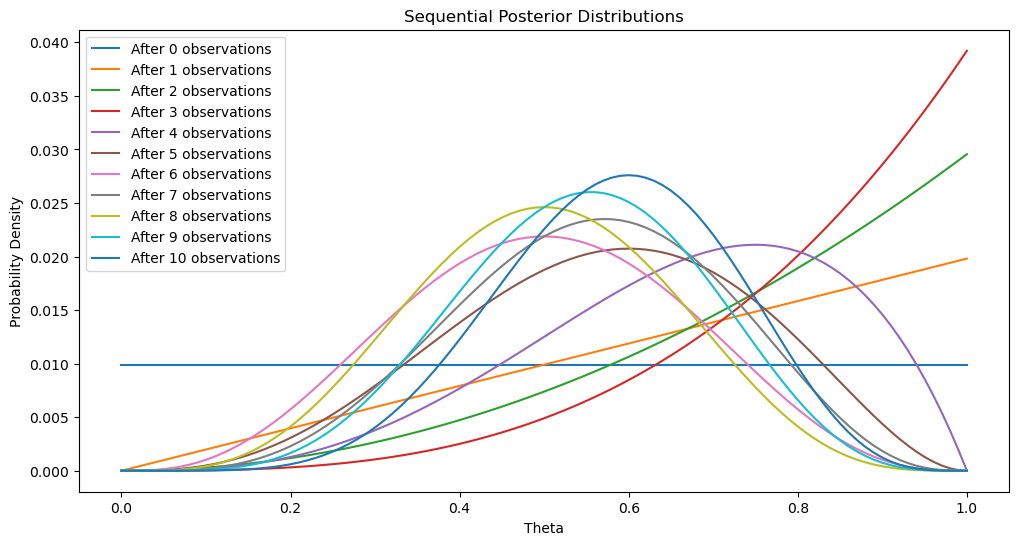

In [1]:
#Q1
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n_trials = 10
theta_values = np.linspace(0, 1, 101)
prior = np.ones_like(theta_values) / len(theta_values)
observations = np.random.binomial(1, 0.6, n_trials)

posterior = prior.copy()
posteriors = [posterior.copy()]

for i, obs in enumerate(observations):
    likelihood = binom.pmf(obs, 1, theta_values)
    posterior = likelihood * posterior
    posterior /= posterior.sum()
    posteriors.append(posterior.copy())

plt.figure(figsize=(12, 6))
for i, post in enumerate(posteriors):
    plt.plot(theta_values, post, label=f"After {i} observations")
plt.xlabel("Theta")
plt.ylabel("Probability Density")
plt.title("Sequential Posterior Distributions")
plt.legend()
plt.show()

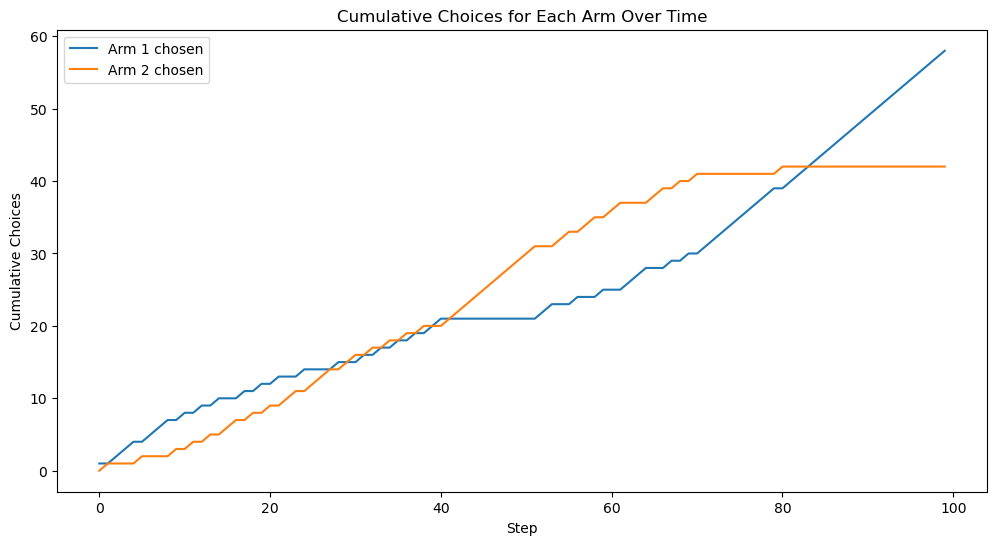

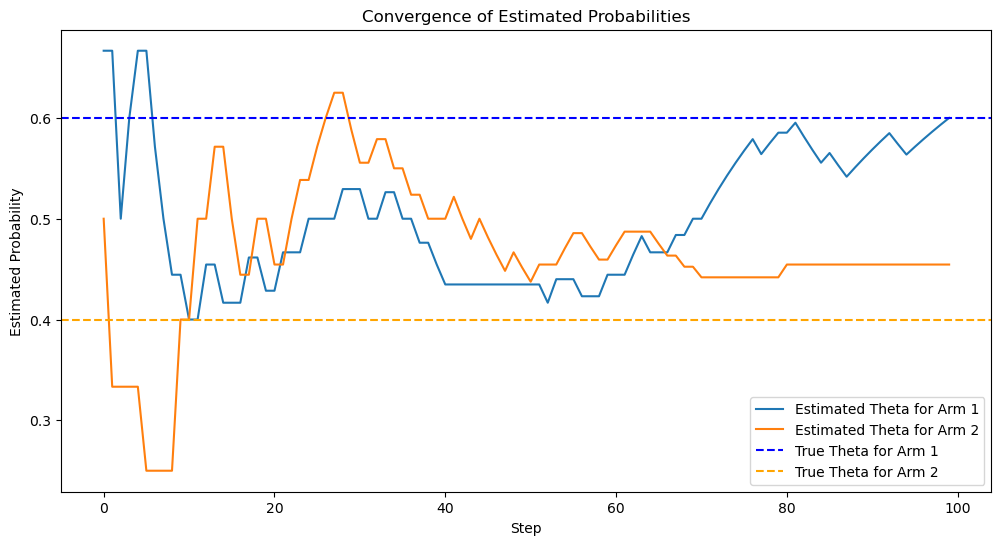

In [2]:
#Q2
theta_true = [0.6, 0.4]
n_steps = 100 
prior_alpha = [1, 1] 
prior_beta = [1, 1]  

choices = []
rewards = []
estimates = {0: [], 1: []}

for t in range(n_steps):
    sampled_theta = [
        np.random.beta(prior_alpha[i], prior_beta[i]) for i in range(2)
    ]
    
    chosen_arm = np.argmax(sampled_theta)
    choices.append(chosen_arm)
    
    reward = np.random.rand() < theta_true[chosen_arm]
    rewards.append(reward)
    
    prior_alpha[chosen_arm] += reward
    prior_beta[chosen_arm] += 1 - reward
    
    for i in range(2):
        estimates[i].append(prior_alpha[i] / (prior_alpha[i] + prior_beta[i]))

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum([1 if c == 0 else 0 for c in choices]), label="Arm 1 chosen")
plt.plot(np.cumsum([1 if c == 1 else 0 for c in choices]), label="Arm 2 chosen")
plt.xlabel("Step")
plt.ylabel("Cumulative Choices")
plt.title("Cumulative Choices for Each Arm Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(estimates[0], label="Estimated Theta for Arm 1")
plt.plot(estimates[1], label="Estimated Theta for Arm 2")
plt.axhline(theta_true[0], color="blue", linestyle="--", label="True Theta for Arm 1")
plt.axhline(theta_true[1], color="orange", linestyle="--", label="True Theta for Arm 2")
plt.xlabel("Step")
plt.ylabel("Estimated Probability")
plt.title("Convergence of Estimated Probabilities")
plt.legend()
plt.show()